##### Social Media Analytics
### Social Network Analysis
# Network measures
(c) Nuno António 2021-2022 - Version 1.01

## Networkx documentation
- Centrality measures: https://networkx.org/documentation/stable/reference/algorithms/centrality.html
- Page rank: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
- Clustering: https://networkx.org/documentation/stable/reference/algorithms/clustering.html
- Similarity: https://networkx.org/documentation/stable/reference/algorithms/similarity.html

In [1]:
# Import the packages
from numpy import array
import networkx as nx
from IPython.display import Image

## Undirected graph
### Could represent friends ties in a social network such as Facebook

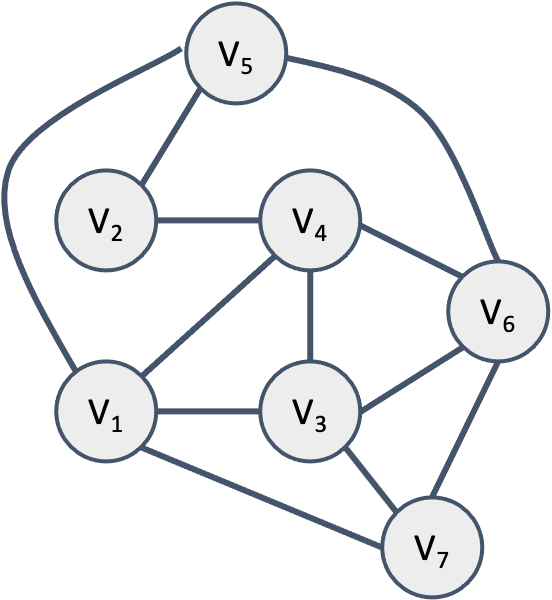

In [2]:
Image(filename="UndirectedGraph2.png")

In [3]:
# Create and check the edge list of undirected graph
UG = nx.Graph()
UG.add_edge('v1','v3')
UG.add_edge('v1','v4')
UG.add_edge('v1','v5')
UG.add_edge('v1','v7')
UG.add_edge('v2','v4')
UG.add_edge('v2','v5')
UG.add_edge('v3','v4')
UG.add_edge('v3','v6')
UG.add_edge('v3','v7')
UG.add_edge('v4','v6')
UG.add_edge('v5','v6')
UG.add_edge('v6','v7')

In [4]:
# Get nodes centrality (degree normalized by dividing by the total number of nodes -1)
# Example: the more connected persons in a network
dc = nx.degree_centrality(UG)
dc = sorted(dc.items(), key=lambda x: x[1], reverse=True)
dc

[('v1', 0.6666666666666666),
 ('v3', 0.6666666666666666),
 ('v4', 0.6666666666666666),
 ('v6', 0.6666666666666666),
 ('v5', 0.5),
 ('v7', 0.5),
 ('v2', 0.3333333333333333)]

In [5]:
# Eigenvector centrality
# Not all "friends" friends are important, so let's take in consideration the centrality of friends
ec = nx.eigenvector_centrality(UG)
ec = sorted(ec.items(), key=lambda x: x[1], reverse=True)
ec

[('v3', 0.4545022660845165),
 ('v1', 0.42542785843224135),
 ('v6', 0.42542785843224135),
 ('v4', 0.41843372720216526),
 ('v7', 0.36338415744051866),
 ('v5', 0.2919101595756714),
 ('v2', 0.19774628558081075)]

In [6]:
# Assessing the importance of users by measuring how they help connect to other users
# Betweeness centrality
bc = nx.betweenness_centrality(UG)
bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)
bc

[('v4', 0.18999999999999997),
 ('v1', 0.13777777777777778),
 ('v6', 0.13777777777777778),
 ('v5', 0.10999999999999999),
 ('v3', 0.05222222222222222),
 ('v2', 0.02222222222222222),
 ('v7', 0.016666666666666666)]

In [7]:
# Assessing how central/influential users are by measuring how quick they reach other users
# Closeness centrality
cc = nx.closeness_centrality(UG)
cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
cc

[('v1', 0.75),
 ('v3', 0.75),
 ('v4', 0.75),
 ('v6', 0.75),
 ('v5', 0.6666666666666666),
 ('v7', 0.6),
 ('v2', 0.5454545454545454)]

In [8]:
# Measure Transitivity (when a friend of a friend is my friend)
# The fraction of all possible triangles
tra = nx.transitivity(UG)
tra

0.3870967741935484

In [9]:
# Measure the Clustering coefficient of each node
ccoef = nx.clustering(UG)
ccoef

{'v1': 0.3333333333333333,
 'v3': 0.6666666666666666,
 'v4': 0.3333333333333333,
 'v5': 0,
 'v7': 0.6666666666666666,
 'v2': 0,
 'v6': 0.3333333333333333}

In [10]:
# Compute the similarity of nodes - how similar are users?
# Jaccard similarity
jacS = nx.jaccard_coefficient(UG)
for u, v, p in jacS:
    print(f"({u}, {v}) -> {p:.8f}")

(v3, v5) -> 0.40000000
(v3, v2) -> 0.20000000
(v2, v7) -> 0.00000000
(v2, v6) -> 0.50000000
(v2, v1) -> 0.50000000
(v6, v1) -> 1.00000000
(v5, v7) -> 0.50000000
(v5, v4) -> 0.75000000
(v7, v4) -> 0.75000000


## Directed graph
### Could represent individuals who post in other individuals accounts or individuals who retweet other individuals' tweets

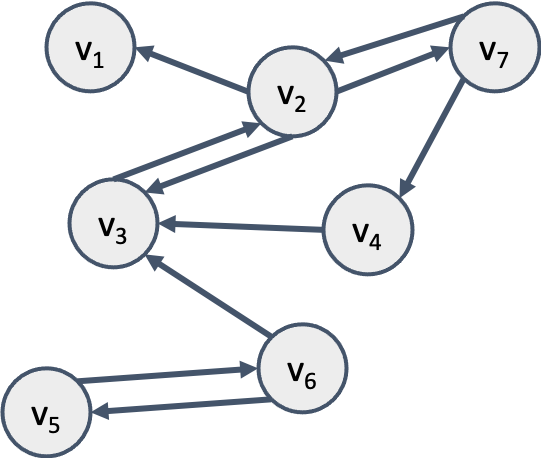

In [11]:
Image(filename="DirectedGraph2.png")

In [12]:
# Create the graph
DG = nx.DiGraph()
DG.add_edge('v2','v1')
DG.add_edge('v2','v3')
DG.add_edge('v2','v7')
DG.add_edge('v3','v2')
DG.add_edge('v4','v3')
DG.add_edge('v5','v6')
DG.add_edge('v6','v3')
DG.add_edge('v6','v5')
DG.add_edge('v7','v2')
DG.add_edge('v7','v4')

In [13]:
# Compute in-degree centrality
# Prestige users - people who are most followed in a network
indc = nx.in_degree_centrality(DG)
indc = sorted(indc.items(), key=lambda x: x[1], reverse=True)
indc

[('v3', 0.5),
 ('v2', 0.3333333333333333),
 ('v1', 0.16666666666666666),
 ('v7', 0.16666666666666666),
 ('v4', 0.16666666666666666),
 ('v5', 0.16666666666666666),
 ('v6', 0.16666666666666666)]

In [14]:
# Compute out-degree centrality
# Gregarious users - people who follow other people (usual similar people)
outdc = nx.out_degree_centrality(DG)
outdc = sorted(outdc.items(), key=lambda x: x[1], reverse=True)
outdc

[('v2', 0.5),
 ('v7', 0.3333333333333333),
 ('v6', 0.3333333333333333),
 ('v3', 0.16666666666666666),
 ('v4', 0.16666666666666666),
 ('v5', 0.16666666666666666),
 ('v1', 0.0)]

In [15]:
# Get nodes centrality - based on in and out centrality
dc = nx.degree_centrality(DG)
dc = sorted(dc.items(), key=lambda x: x[1], reverse=True)
dc

[('v2', 0.8333333333333333),
 ('v3', 0.6666666666666666),
 ('v7', 0.5),
 ('v6', 0.5),
 ('v4', 0.3333333333333333),
 ('v5', 0.3333333333333333),
 ('v1', 0.16666666666666666)]

In [16]:
# Katz centrality
# Not all "friends" friends are important, so let's take in consideration the centrality of friends
kc = nx.katz_centrality(DG)
kc = sorted(kc.items(), key=lambda x: x[1], reverse=True)
kc

[('v3', 0.43461350345012945),
 ('v2', 0.4023833228710058),
 ('v1', 0.3628730128813635),
 ('v7', 0.3628730128813635),
 ('v4', 0.35892198962563204),
 ('v5', 0.35848299994704985),
 ('v6', 0.35848299994704985)]

In [17]:
# Centrality based on PageRank
pr = nx.pagerank(DG)
pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)
pr

[('v2', 0.2782558501516343),
 ('v3', 0.22878151036144098),
 ('v1', 0.11412520841392358),
 ('v7', 0.11412520841392358),
 ('v6', 0.10220012133517183),
 ('v4', 0.0837902890198752),
 ('v5', 0.07872181230403043)]

In [18]:
# Assessing the importance of users by measuring how they help connect to other users
# Betweeness centrality
bc = nx.betweenness_centrality(DG)
bc = sorted(bc.items(), key=lambda x: x[1], reverse=True)
bc

[('v2', 0.4166666666666667),
 ('v3', 0.36666666666666664),
 ('v6', 0.16666666666666666),
 ('v7', 0.13333333333333333),
 ('v4', 0.016666666666666666),
 ('v1', 0.0),
 ('v5', 0.0)]

In [19]:
# Assessing how central/influential users are by measuring how quick they reach other users
# Closeness centrality
cc = nx.closeness_centrality(DG)
cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
cc

[('v3', 0.5952380952380952),
 ('v2', 0.462962962962963),
 ('v1', 0.4),
 ('v7', 0.32051282051282054),
 ('v4', 0.2777777777777778),
 ('v5', 0.16666666666666666),
 ('v6', 0.16666666666666666)]

In [20]:
# Measure the overal reciprocity - if a follower (A) of a node (B) is also followed by that node
orec = nx.overall_reciprocity(DG)
orec

0.6

In [21]:
# Measure nodes reciprocity (ex: v1 and v2)
rec = nx.reciprocity(DG,["v1","v2"])
rec

{'v1': 0.0, 'v2': 0.8}

In [22]:
# Compute the similarity of nodes - how similar are users based on the similarity of who reference them
# SimRank similarity 
sim = nx.simrank_similarity(DG)
lol = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = array(lol)
sim_array

array([[1.        , 0.        , 0.63631715, 0.        , 0.3462604 ,
        0.        , 0.9       ],
       [0.        , 1.        , 0.        , 0.73634272, 0.        ,
        0.38481425, 0.        ],
       [0.63631715, 0.        , 1.        , 0.        , 0.50888238,
        0.        , 0.63631715],
       [0.        , 0.73634272, 0.        , 1.        , 0.        ,
        0.31163436, 0.        ],
       [0.3462604 , 0.        , 0.50888238, 0.        , 1.        ,
        0.        , 0.3462604 ],
       [0.        , 0.38481425, 0.        , 0.31163436, 0.        ,
        1.        , 0.        ],
       [0.9       , 0.        , 0.63631715, 0.        , 0.3462604 ,
        0.        , 1.        ]])